In [ ]:
!git clone https://github.com/davidbau/gpwidget -b demo gpwidget 2>> install.log
import sys
sys.path.append('/content/gpwidget')

Downloading: "http://gandissect.csail.mit.edu/models/proggan_churchoutdoor-7e701dd5.pth" to /root/.cache/torch/hub/checkpoints/proggan_churchoutdoor-7e701dd5.pth



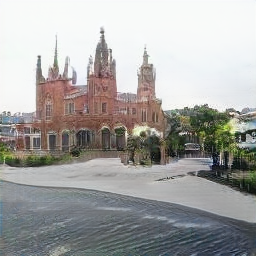

In [ ]:
from ganpaint import nethook, setting, renormalize, zdataset, paintwidget

# Load a generator, and paint random image number 20 in a widget.
G = nethook.InstrumentedModel(setting.load_proggan('church')).cuda()
z = zdataset.z_sample_for_model(G)[20][None].cuda()
V = paintwidget.PaintWidget(image=renormalize.as_url(G(z)[0]))

# Whenever the widget changes, call "changed" to edit the layer and repaint
TREE_UNITS = [119, 125, 157, 195, 365, 374, 418, 426, 408, 3, 297, 322, 343]
def changed(c):
    if not V.mask: return
    a = renormalize.from_url(V.mask, target='pt', size=(8,8))[0]
    def editrule(x, imodel, **buffers):
        x[:,TREE_UNITS] += (a * 20.0).to(x.device)
        return x
    G.edit_layer('layer4', rule=editrule)
    V.mask, V.image = '', renormalize.as_url(G(z)[0])
V.on('mask', changed)

display(V)